<a href="https://colab.research.google.com/github/choheeee22/ProgrammingAssignment2/blob/master/n123a_confidence_intervals_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.

In [ ]:
#파일 열기
from google.colab import files
uploaded = files.upload()

Saving 서울시_기간별_시간평균_대기환경_정보_2020_03.csv to 서울시_기간별_시간평균_대기환경_정보_2020_03 (1).csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['서울시_기간별_시간평균_대기환경_정보_2020_03.csv']),encoding='utf-8',engine='python',skiprows=1,names=['측정일시','권역코드','권역명','측정소코드','측정소명','미세먼지 1시간(㎍/㎥)','미세먼지 24시간(㎍/㎥)','초미세먼지(㎍/㎥)','오존(ppm)','이산화질소농도(ppm)','일산화탄소농도(ppm)','아황산가스농도(ppm)'])

In [ ]:
#original data -df
df

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,2.020030e+11,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,2.020030e+11,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,2.020030e+11,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,2.020030e+11,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,2.020030e+11,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...
18595,2.020030e+11,103,서남권,111231,영등포구,33,29,23,0.002,0.050,0.8,0.003
18596,2.020030e+11,104,동남권,111261,강남구,26,25,19,0.008,0.046,0.7,0.002
18597,2.020030e+11,104,동남권,111262,서초구,46,35,27,0.007,0.054,0.5,0.003
18598,2.020030e+11,104,동남권,111274,강동구,36,31,22,0.002,0.043,0.6,0.002


In [ ]:
#feature 설정 & 송파구 - df1
df1=df[['측정일시','측정소명','오존(ppm)']]
df1
df1=df1.loc[df1['측정소명']=='송파구']
df1

,측정일시,측정소명,오존(ppm)
24,2.020030e+11,송파구,0.020
49,2.020030e+11,송파구,0.021
73,2.020030e+11,송파구,0.025
99,2.020030e+11,송파구,0.032
124,2.020030e+11,송파구,0.034
...,...,...,...
18499,2.020030e+11,송파구,0.002
18524,2.020030e+11,송파구,0.002
18547,2.020030e+11,송파구,0.002
18573,2.020030e+11,송파구,0.002


## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.
- 샘플링을 한 후에 인덱스를 초기화 합니다.

In [15]:
# random datat 저장 (df.sample)
import numpy as np
import matplotlib.pyplot as plt
s1=df1.sample(20,random_state=42)
s1.reset_index()
s2=df1.sample(200,random_state=42)
s2.reset_index()

,index,측정일시,측정소명,오존(ppm)
0,15249,2.020030e+11,송파구,0.021
1,13499,2.020030e+11,송파구,0.020
2,17372,2.020030e+11,송파구,0.002
3,8774,2.020030e+11,송파구,0.009
4,4372,2.020030e+11,송파구,0.044
...,...,...,...,...
195,8948,2.020030e+11,송파구,0.022
196,8121,2.020030e+11,송파구,0.026
197,12171,2.020030e+11,송파구,0.031
198,3497,2.020030e+11,송파구,0.002


## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [23]:
#s1 오존 ppm 표본 평균 -n1
n1=s1['오존(ppm)'].mean()
n1

0.021750000000000002

In [24]:
#s2 오존 ppm 표본 평균 -n2
n2=s2['오존(ppm)'].mean()
n2

0.02291999999999995

## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [42]:
# CI3-s1에 대한 t-interval
from scipy import stats
from scipy.stats import t

# 표본의 크기
n3= len(s1)
# 자유도
dof = n3-1
# 평균의 평균
mean = n1
# 표본의 표준편차
s1_std = np.std(s1, ddof = 1)
# 표준 오차
s1_std_err = s1_std / n3 ** 0.5 # sample_std / sqrt(n)

CI0 = t.interval(0.95, df=n3-1, loc = n1, scale = s1_std_err)
CI3=t.interval(0.95, dof, loc = n1, scale = s1_std_err)
CI3

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([       nan, 0.01506046]), array([       nan, 0.02843954]))

In [44]:
# CI4-S2에 대한 t.interval
# 표본의 크기
n4= len(s2)
# 자유도
dof2 = n4-1
# 평균의 평균
mean2 = n2
# 표본의 표준편차
s2_std = np.std(s2, ddof = 1)
# 표준 오차
s2_std_err = s2_std / n4 ** 0.5 # sample_std / sqrt(n)
CI4=t.interval(0.95, dof2, loc = n2, scale = s2_std_err)
CI4

CI3,CI4

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


((array([       nan, 0.01506046]), array([       nan, 0.02843954])),
 (array([       nan, 0.02100652]), array([       nan, 0.02483348])))

In [83]:
# def로 interval 구하기 - CI1&CI2
def confidence_interval(data, confidence = 0.95):
  
  """
  주어진 데이터의 표본 **평균**에 대한 신뢰구간을 계산.
  기본 값으로 t-분포와 양방향 (two-tailed), 95%의 신뢰도를 사용합니다. 
  
  입력 값 : 
    data - 여러 개로 이루어진 (list 혹은 numpy 배열) 표본 관측치
    confidence - 신뢰구간을 위한 신뢰도 
  
  반환 되는 값:
    (평균, 하한, 상한구간)으로 이루어진 tuple
  """

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  
  # std / sqrt(n)
  stderr = stats.sem(data) 
  # Standard Error of Mean (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)
  # s / sqrt(n)

  # length_of_one_interval
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, stderr, mean - interval, mean + interval)

In [84]:
#CI1
CI1=confidence_interval(s1['오존(ppm)'],confidence = 0.95)
CI1

(0.02175, 0.0031961119471863573, 0.015060460813957321, 0.028439539186042674)

In [85]:
#CI2
CI2=confidence_interval(s2['오존(ppm)'],confidence = 0.95)
CI2

(0.02292, 0.00097034832889895, 0.02100651526262625, 0.02483348473737375)

## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






In [116]:
# 시각화 (bar plot 먼저)
import seaborn as sns
x=pd.DataFrame([["s1", 0.02175, 0.0031961119471863573, 0.015060460813957321, 0.028439539186042674],["s2",0.02292, 0.00097034832889895, 0.02100651526262625, 0.02483348473737375]],columns=['Group','Mean','SD','Low','High'])
x
x.reset_index()
x.set_index(x['Group'])
x

,Group,Mean,SD,Low,High
0,s1,0.02175,0.003196,0.015060,0.028440
1,s2,0.02292,0.000970,0.021007,0.024833


In [120]:
pop_mean=(CI1[0]+CI2[0])/2
pop_mean

0.022335

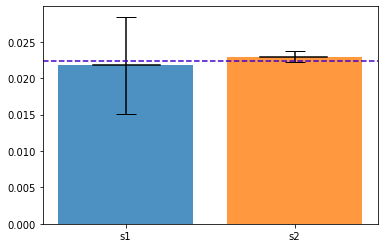

In [123]:
# yerr과 capsize를 이용하면 신뢰구간 표현가능

plt.bar(x = 's1', height = CI1[0], yerr = CI1[2]-CI1[0], capsize = 10,color='#4C91C2')
plt.bar(x = 's2', height = CI2[0], yerr = CI2[2]-CI1[0], capsize = 10,color='#FF983E')
plt.axhline(pop_mean, linestyle = '--', color = '#4000c7')
plt.axhline(CI1[0], color = 'black', xmin = 0.15, xmax = 0.35)
plt.axhline(CI2[0], color = 'black', xmin = 0.65, xmax = 0.85)

# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다

## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한정리를 구현하는 코드를 작성하세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다